# Lab 01 - Data Simulation And Sampling

In this lab, we learn how to create datasets from simple probabilistic models and estimate parameters of the dataset. We begin with defining the following two deterministic models:

$$ Y^{\left(1\right)} = 2X - 1, \quad\quad Y^{\left(2\right)} = 3sin\left(2X - 2\right) - 3 \sqrt{|X|} $$

*where we use the $\cdot^{\left(1\right)}, \cdot^{\left(2\right)}$ to distinguish between the two models in the code below. In addition, variable naming follows conventions of probability theory and random variables, instead of those usually seen in python. This is done for educational reasons.*

In [1]:
import sys 
sys.path.append("../")
from utils import *

from scipy.stats import norm

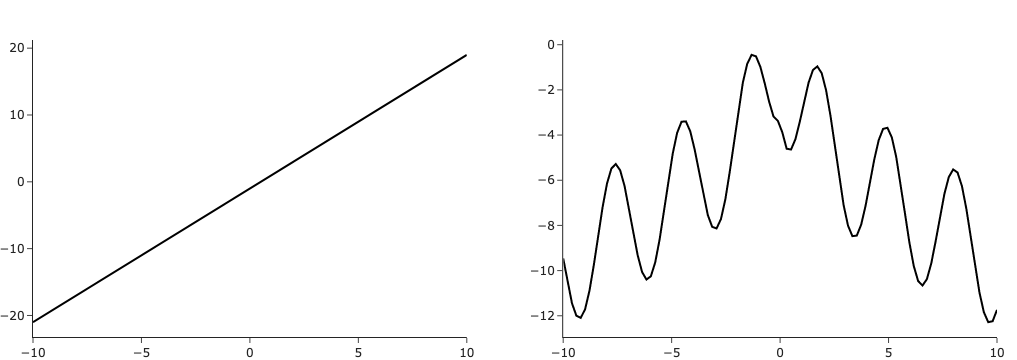

In [2]:
m = 100
X = np.linspace(-10, 10, m)

Y1 = 2*X -1
Y2 = 3*np.sin(2*X + -2) -3*np.sqrt(np.abs(X))


fig = make_subplots(rows=1, cols=2)\
    .add_traces([go.Scatter(x=X, y=Y1, mode='lines', marker=dict(color="black"), showlegend=False),
                 go.Scatter(x=X, y=Y2, mode='lines', marker=dict(color="black"), showlegend=False)], 
                rows=[1,1], cols=[1,2])\
    .update_layout(title_text=r"$\text{(1) Generating Data From Model}$", height=300)
fig.show()

Next, we want to define a probabilistic model based on the models seen before. Let us assume that the sample noise has a Gaussian distribution, centered around zero with some variance. So:

$$ Y^{\left(1\right)} = 2X - 1 + \varepsilon, \quad\quad Y^{\left(2\right)} = 3sin\left(2X - 2\right) - 3 \sqrt{|X|} + \varepsilon $$

where $\varepsilon\sim\mathcal{N}\left(0,\sigma^2\right)$ for some values of $\sigma^2$. We will further assume that the noise of different samples is independent of the other samples. So we could write it as $\varepsilon_1,\ldots,\varepsilon_m\overset{iid}{\sim}\mathcal{N}\left(0,\sigma^2\right)$ or in vector notations $\varepsilon\sim\mathcal{N}\left(0,\sigma^2 I_m\right)$, where $\mathcal{N}$ now refers to a $m$ dimensional multivariate normal distribution.

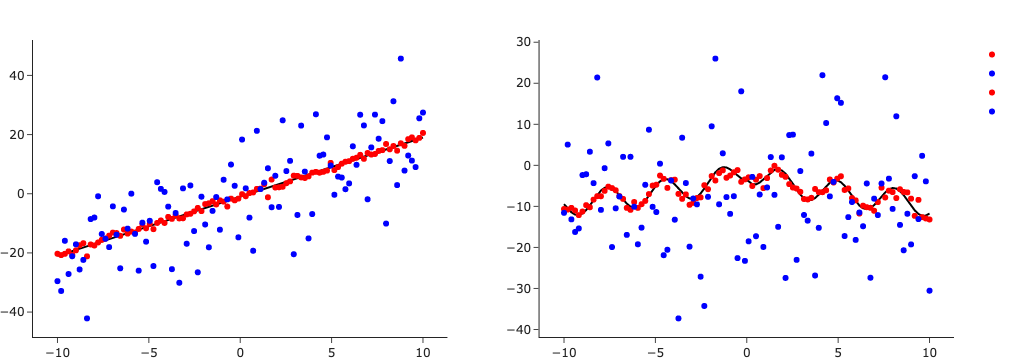

In [3]:
Y1_noisy   = Y1 + np.random.normal(0, 1, size=m)
Y1_noisier = Y1 + np.random.normal(0, 12, size=m)

Y2_noisy   = Y2 + np.random.normal(0, 1, size=m)
Y2_noisier = Y2 + np.random.normal(0, 12, size=m)


make_subplots(rows=1, cols=2)\
    .add_traces([go.Scatter(x=X, y=Y1, mode='lines', marker=dict(color="black"), showlegend=False),
                 go.Scatter(x=X, y=Y2, mode='lines', marker=dict(color="black"), showlegend=False)], 
                rows=[1,1], cols=[1,2])\
    .add_traces([go.Scatter(x=X, y=Y1_noisy,   mode='markers', marker=dict(color="red"),  name="$\\mathcal{N}\\left(0,1\\right)$"),
                 go.Scatter(x=X, y=Y1_noisier, mode='markers', marker=dict(color="blue"), name="$\\mathcal{N}\\left(0,12\\right)$"),
                 go.Scatter(x=X, y=Y2_noisy,   mode='markers', marker=dict(color="red"), name="$\\mathcal{N}\\left(0,1\\right)$"),
                 go.Scatter(x=X, y=Y2_noisier, mode='markers', marker=dict(color="blue"), name="$\\mathcal{N}\\left(0,12\\right)$")], 
    rows=1, cols=[1,1,2,2])\
    .update_layout(title_text=r"$\text{(2) Generating Data From Probabilistic Model}$", height=300)\
    .show()


Notice how the data simulated with sample noise of $\mathcal{N}\left(0,1\right)$ is close to the "true" model. This closeness can also be thought of as how easy it will be to infer the true model given the noisy data. Compared to the low sample noise case, the data simulated with the sample noise of $\mathcal{N}\left(0,12\right)$ much less resembles the true model. Given this kind of data, it will be much more difficult to infer the actual *signal* of the data and *learn* the actual model that generated the data.

# Modeling Sample Noise Using Normal Distributions

## Samples And Histograms

Given a dataset, we want to gather insights into what the data tells us. One way of doing so is by plotting a histogram of the given values. So, given a set of 1D data-points scattered along the axis of rational numbers, we can *bin* these values into discrete categories and count how many samples we see in each bin. If we then also divide each bin by the total number of samples, we get the density of the data over the different bins.

Run the code below with different number of samples and different number of bins. How does the number of samples influence the created figure (in terms of The Law of Large Numbers)? What can we say about the number of bins?

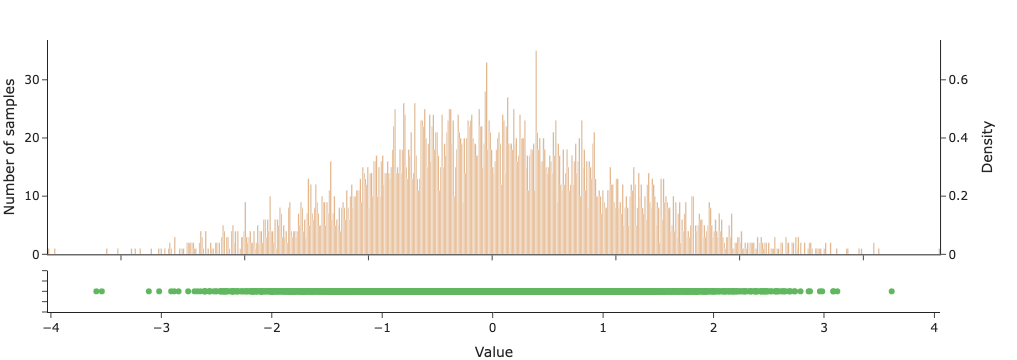

In [4]:
m, bins = 5000, 1000
X = np.random.normal(0, 1, m)

fig = make_subplots(rows=5, cols=1, specs=[[{"rowspan": 4, "secondary_y": True}], [None], [None], [None], [{}]])\
    .add_trace(go.Histogram(x=X, opacity=0.75, bingroup=1, nbinsx=bins), secondary_y=False)\
    .add_trace(go.Histogram(x=X, opacity=0.75, bingroup=1, nbinsx=bins, histnorm="probability density"), secondary_y=True)\
    .add_trace(go.Scatter(x=X, y=[0]*X.shape[0], mode='markers', opacity=0.75), row=5, col=1)

fig.update_layout(title_text="$\\text{(3) Histograms of Sample }X\\sim\\mathcal{N}\\left(0,1\\right)$")\
    .update_yaxes(title_text="Number of samples", secondary_y=False, row=1, col=1)\
    .update_yaxes(title_text="Density", secondary_y=True, row=1, col=1)\
    .update_yaxes(showgrid=False, row=5, col=1, showticklabels=False)\
    .update_xaxes(showgrid=False, title_text="Value", row=5, col=1)\
    .update_xaxes(showticklabels=False, row=1, col=1)\
    .update_layout(showlegend=False)

fig.show()


When the given data is of a higher dimensionality, and we are interested in understanding the correlation between two different dimensions, we can look at a 2D histogram (or heatmap) of the data, as well as the marginal distributions of each dimension.

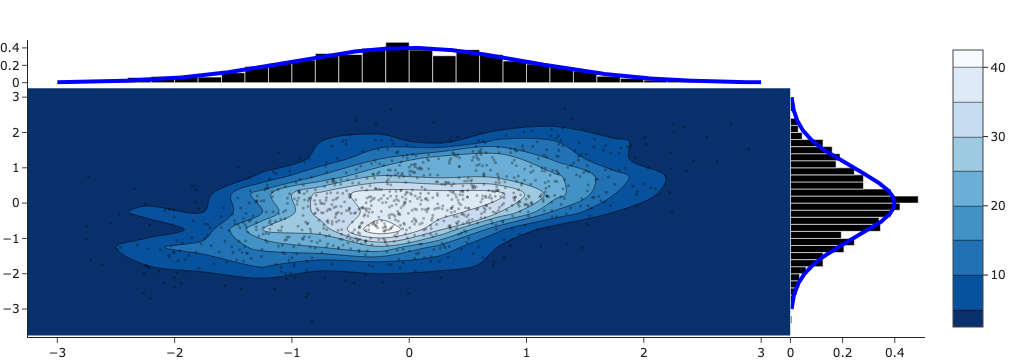

In [5]:
mu = [0, 0]
sigma = [[1, 0.5],
         [0.5, 1]]
S = np.random.multivariate_normal(mu, sigma, 1000)

X_axis = np.linspace(-3, 3, 500)

theoretical_distribution_x = norm.pdf(X_axis, 0, 1)
theoretical_distribution_y = theoretical_distribution_x


go.Figure()\
.add_trace(go.Histogram2dContour(x=S[:, 0], y=S[:, 1], 
        colorscale = 'Blues', reversescale = True, xaxis = 'x', yaxis = 'y'))\
.add_trace(go.Scatter(x = S[:, 0], y=S[:, 1], xaxis = 'x', yaxis = 'y', mode = 'markers', marker = dict( color = 'rgba(0,0,0,0.3)', size = 3)))\
.add_trace(go.Histogram(y = S[:, 1], histnorm="probability density", xaxis = 'x2', marker = dict(color = 'rgba(0,0,0,1)')))\
.add_trace(go.Histogram(x = S[:, 0], histnorm="probability density", yaxis = 'y2', marker = dict(color = 'rgba(0,0,0,1)')))\
.add_trace(go.Scatter(x=X_axis, y=theoretical_distribution_x, mode='lines', name=r'$N(0, 1)$',yaxis='y2', line=dict(width=4, color="rgb(0,0,255)")))\
.add_trace(go.Scatter(y=X_axis, x=theoretical_distribution_x, mode='lines', name=r'$N(0, 1)$', xaxis='x2', line=dict(width=4, color="rgb(0,0,255)")))\
.update_layout(
    xaxis = dict(zeroline = False, domain = [0,0.85], showgrid = False),
    yaxis = dict(zeroline = False, domain = [0,0.85], showgrid = False),
    xaxis2 = dict(zeroline = False, domain = [0.85,1], showgrid = False),
    yaxis2 = dict(zeroline = False, domain = [0.85,1], showgrid = False),
    hovermode = 'closest', showlegend = False,
    title=r"$\text{(4) 2D scatter and marginal distributions}$"
)\
.show()

# Parameter Estimation

Now that we are assuming some Gaussian model, given a sample we can estimate the mean and variance of the data. To do so we will use the following estimators:

$$\hat\mu = \frac{1}{m} \sum_{i=1}^m X_i \quad\overset{m \rightarrow \infty}{\rightarrow} \mu$$
$$\hat\sigma^2 = \frac{1}{m-1} \sum_{i=1}^m \left(X_i - \overline{X}\right)^2 \quad\overset{m \rightarrow \infty}{\rightarrow} \sigma^2$$

Meaning, that for both these estimators, as the number of samples increases, we get closer and closer to the actual true value of the parameter estimated. Let us estimate these parameters (the mean and variance) of samples of increasing size.

In [18]:
ms = np.linspace(2, 200, 500).astype(np.int)
mu, sigma = 5, 2

/var/folders/z6/qycklcf538x2bctx8h4jg0w80000gn/T/ipykernel_36139/3055576651.py:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



### Estimating Expectation of Distribution

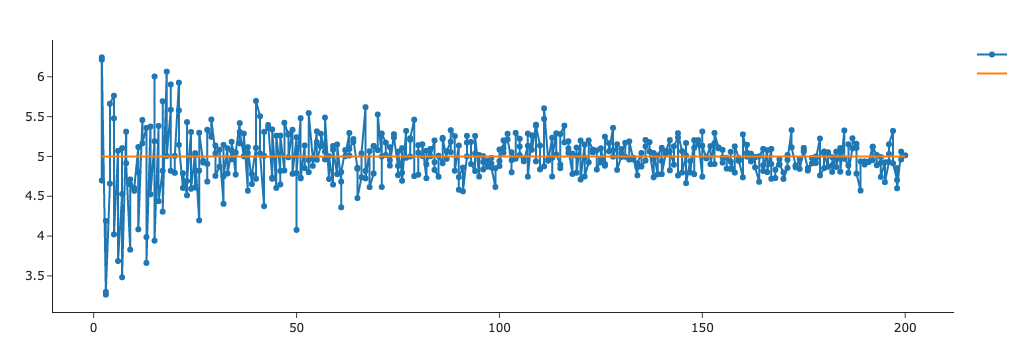

In [19]:
estimated_mean = []
for m in ms:
    X = np.random.normal(mu, sigma, size=m)
    estimated_mean.append(np.mean(X)) 

    
go.Figure([go.Scatter(x=ms, y=estimated_mean, mode='markers+lines', name=r'$\widehat\mu$'),
           go.Scatter(x=ms, y=[mu]*len(ms), mode='lines', name=r'$\mu$')],
          layout=go.Layout(title=r"$\text{(5) Estimation of Expectation As Function Of Number Of Samples}$", 
                  xaxis_title="$m\\text{ - number of samples}$", 
                  yaxis_title="r$\hat\mu$",
                  height=300)).show()

### Estimating Variance Of Distribution

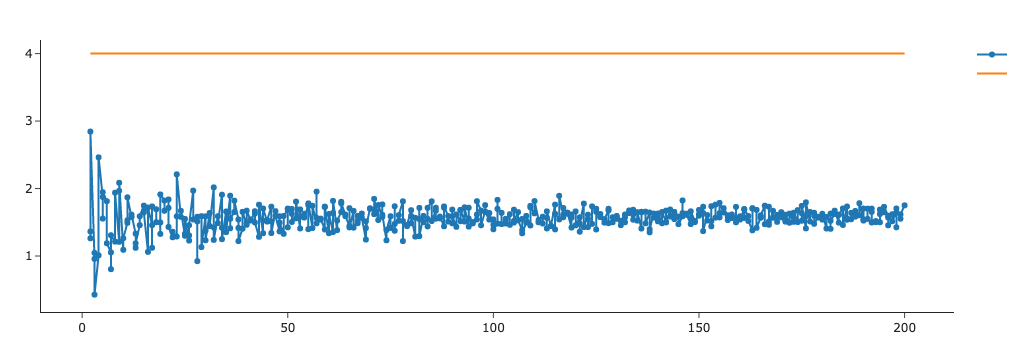

In [44]:
estimated_sigmas = []
np.random.seed(0)
for m in ms:
    X = np.random.normal(mu, sigma, size=m)
    estimated_sigmas.append(np.sum(np.abs(X-np.mean(X)))/(m)) 
    # estimated_sigmas.append(X.var(ddof=1)) 
    

go.Figure([go.Scatter(x=ms, y=estimated_sigmas, mode='markers+lines', name=r'$\widehat\sigma^2$'),
           go.Scatter(x=ms, y=[sigma**2]*len(ms), mode='lines', name=r'$\sigma^2$')],
         layout=go.Layout(title=r"$\text{(6) Estimation of Variance As Function Of Number Of Samples}$", 
                          xaxis_title="$m\\text{ - number of samples}$", 
                          yaxis_title="r$\hat\sigma^2$",
                          height=300)).show()


# The Variance Of An Estimator
Observe another important property of this estimator for the expectation $\hat\mu$:
$$Var\left(\hat\mu \right) \overset{m \rightarrow \infty}{\rightarrow} 0$$

Meaning, that as the number of samples increases, not just that our estimation of $\mu$ is closer to the real value, but also the variance of this estimation (how will it differ given a different set of $m$ data-points) decreases. In other words, our **confidence** in our estimation increases.

To measure the variance of an estimator we need simulations. It is not enough to sample $m$ samples from the distributions, but we should also repeat this process $N$ times. For each $m$, we end up with $N$ different values of $\hat\mu$, over which we can compute the variance of estimation.

This variance is often visualized as upper and lower bounds around the average estimation of the estimator. This is what is known as a **confidence interval**.

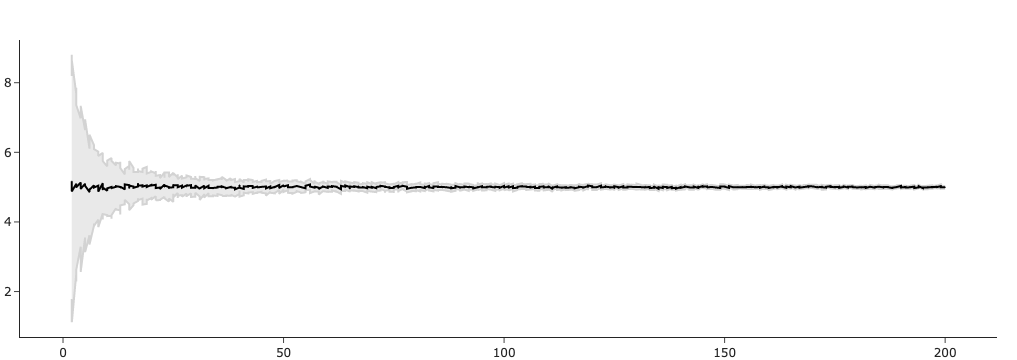

In [34]:
N = 100

estimations = np.zeros((len(ms), N))
for i, m in enumerate(ms):
    estimations[i,:] = np.array([np.mean(np.random.normal(mu, sigma, m)) for _ in range(N)])
    
means = estimations.mean(axis=1)
variances = estimations.var(ddof=1, axis=1)

go.Figure([go.Scatter(x=ms, y=means-2*variances, fill=None, mode="lines", line=dict(color="lightgrey"), showlegend=False),
           go.Scatter(x=ms, y=means+2*variances, fill='tonexty', mode="lines", line=dict(color="lightgrey"), showlegend=False),
           go.Scatter(x=ms, y=means, mode="markers+lines", marker=dict(color="black",size=1), showlegend=False)],
         layout=go.Layout(title=r"$\text{(7) Mean and Variance of Estimator of Expectation As Function Of Sample Size}$",
                         height=300)).show()


## Bonus - Distribution Of An Estimator
Sometimes we are able to state more than just some momente of an estimator, but rather describe the entire distribution. In the case of Gaussian distributions, for $X\sim\mathcal{N}\left(\mu,\sigma^2\right)$, the distribution of the empirical mean estimator is
$$\hat\mu \backsim \mathcal{N}\left(\mu, \frac{\sigma^2}{M}\right)$$

Namely, it is also a normal distribution, centered around the true value of $mu$, with a variance decreasing as the number of samples increases. As $m\rightarrow\infty$ the variance itself goes to zero. Let us visualize this distribution for different values of $m$. You can imagine that we slice the figure above at two points, and observe the distribution of the calculated estimators at those points.

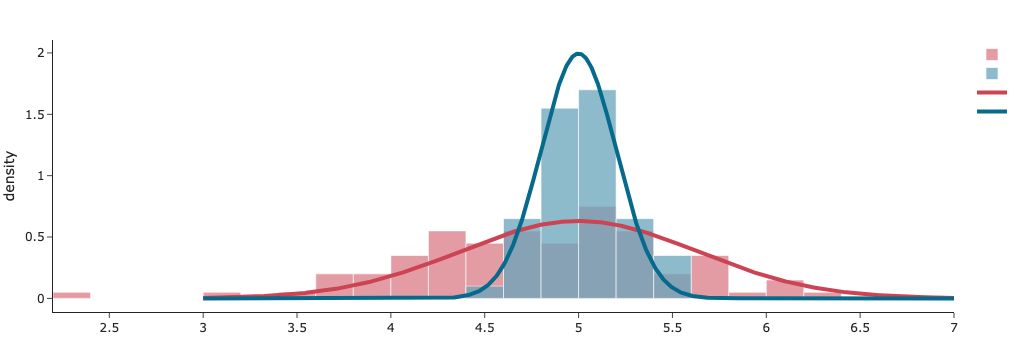

In [10]:
m1, m2 = 10, 100

mu1 = [np.mean(np.random.normal(mu, sigma, size=m1)) for _ in range(N)]
mu2 = [np.mean(np.random.normal(mu, sigma, size=m2)) for _ in range(N)]


X = np.linspace(3, 7, 1000)
theoretical_dist_m = norm.pdf(X, mu, np.sqrt(sigma**2/m1))
theoretical_dist_M = norm.pdf(X, mu, np.sqrt(sigma**2/m2))

go.Figure([go.Histogram(x=mu1, opacity=0.75, bingroup=1, histnorm='probability density', marker_color="rgb(219,124,134)", name=r'$\hat\mu_1$'),
           go.Histogram(x=mu2, opacity=0.75, bingroup=1, histnorm='probability density', marker_color="rgb(105,165,186)", name=r'$\hat\mu_2$'),
    
           go.Scatter(x=X, y=theoretical_dist_m, mode='lines', line=dict(width=4, color="rgb(204,68,83)"), name=r'$N(\mu, \frac{\sigma^2}{m1})$'),
           go.Scatter(x=X, y=theoretical_dist_M, mode='lines', line=dict(width=4, color="rgb(6,106,141)"), name=r'$N(\mu, \frac{\sigma^2}{m2})$')],
         layout=go.Layout(barmode='overlay',
                          title=r"$\text{(8) Mean estimator distribution}$", 
                          xaxis_title="r$\hat\mu$", 
                          yaxis_title="density",
                          height=300)).show()

# Time To Think...

The estimators for the mean value (the empirical average) and variance are *unbiased* estimators. This means that if we compute them, each time over a different dataset and average the results, we will approximatly get their true value $\mathbb{E}\left(\widehat{\theta}\right) = \theta$. Though, we will see this in more details later in the course, let us ovserve the differences between a *biased* and *unbiased* estimator.

Consider the following possible (though perhaps less logical) estimator for the mean:
$\tilde\mu = \frac{1}{m} \sum_{n=1}^m X_i + 2$. Compute and plot this estimator in figure $5$ similar to the manner $\widehat{\mu}$ is plotted. Simply add an additional `go.Scatter(x=ms, y=estimated_mean_new_estimator, ...)` call to the existing list. Note the difference between the two estimators.

Perhaps a less simple example would be to look at the following possible estimator of variance $\tilde\sigma^2 = \frac{1}{m} \sum_{n=1}^m |X_i - \bar{X}|$. It might sound like a good estimator (it measures the absolute deviation from the mean). As before, compute and plot this estimator in figure $6$. Based on what you see, is this a biased or unbiased estimator?